In [167]:
from pandas_datareader import data 
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import os
from google.colab import drive
from geopy.geocoders import Nominatim

In [168]:
# Load Dataset

drive.mount('/content/drive')


DIRECTORY = "/content/drive/Shareddrives/dataset"

if os.getcwd() != DIRECTORY:
  os.chdir(DIRECTORY)

df1 = pd.read_csv('./data1/hotel_bookings.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [169]:
df1.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Finding Null values in Dataset. As we can see Country, company, agent have null values.**

In [170]:
df1.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Data Cleaning: Dropped the columns with null values

In [171]:
df1=df1.drop(['country','agent','company'],axis=1)
df1=df1.dropna()
df1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [172]:
df1.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [173]:
df1["arrival_date_year"].value_counts()

2016    56707
2017    40687
2015    21992
Name: arrival_date_year, dtype: int64

**Correlation**:  It checks for linear correlation between two continous variables.

In [174]:
correlation_matrix = df1.corr()
correlation_matrix

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293177,0.016732,0.008132,-0.006084,-0.001783,0.024771,0.059990,0.005048,-0.032488,-0.084788,0.110140,-0.057355,-0.144371,0.054193,0.047622,-0.195492,-0.234706
lead_time,0.293177,1.000000,0.040093,0.126885,0.002234,0.085667,0.165799,0.119544,-0.037622,-0.020918,-0.124418,0.086040,-0.073552,0.000138,0.170083,-0.063126,-0.116461,-0.095688
arrival_date_year,0.016732,0.040093,1.000000,-0.540566,-0.000279,0.021489,0.030878,0.029674,0.054624,-0.013197,0.010332,-0.119833,0.029214,0.030855,-0.056506,0.197518,-0.013699,0.108585
arrival_date_week_number,0.008132,0.126885,-0.540566,1.000000,0.066824,0.018209,0.015559,0.025901,0.005518,0.010397,-0.030129,0.035502,-0.020902,0.005512,0.022935,0.075811,0.001924,0.026139
arrival_date_day_of_month,-0.006084,0.002234,-0.000279,0.066824,1.000000,-0.016370,-0.028192,-0.001539,0.014544,-0.000233,-0.006152,-0.027015,-0.000303,0.010601,0.022723,0.030189,0.008675,0.003094
stays_in_weekend_nights,-0.001783,0.085667,0.021489,0.018209,-0.016370,1.000000,0.498967,0.091889,0.045793,0.018483,-0.087242,-0.012775,-0.042716,0.063280,-0.054153,0.049323,-0.018556,0.072686
stays_in_week_nights,0.024771,0.165799,0.030878,0.015559,-0.028192,0.498967,1.000000,0.092983,0.044203,0.020191,-0.097247,-0.013993,-0.048744,0.096210,-0.002020,0.065219,-0.024861,0.068199
adults,0.059990,0.119544,0.029674,0.025901,-0.001539,0.091889,0.092983,1.000000,0.030447,0.018148,-0.146425,-0.006736,-0.107983,-0.051666,-0.008280,0.230690,0.014791,0.122855
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,-0.033273,0.324854,0.056253,0.081745
babies,-0.032488,-0.020918,-0.013197,0.010397,-0.000233,0.018483,0.020191,0.018148,0.024030,1.000000,-0.008943,-0.007501,-0.006551,0.083439,-0.010621,0.029183,0.037383,0.097893


The numerical data has pairs of moderately linear correlated features.
1. previous_cancellations & previous_cancellations (0.39)
2. stays_in_week_nights & stays_in_weekend_nights (0.55)

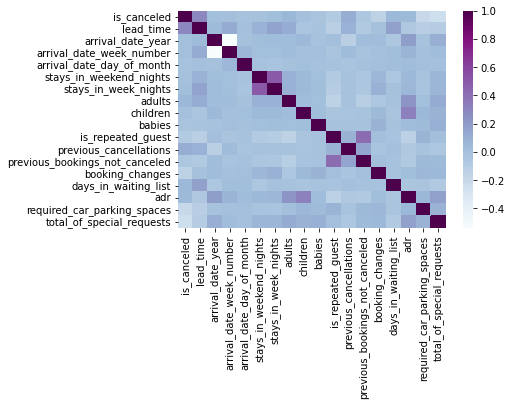

In [175]:
sns.heatmap(data=df1.corr(),cmap="BuPu")